# Detecção de Faudes 

In [1]:
from minisom import MiniSom
import pandas as pd
import numpy as np

In [2]:
base = pd.read_csv("credit_data.csv")
base.head(5)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
base = base.dropna()

In [4]:
# Subistituindo os valores das idades negativas pela média de idade da base de dados

base.loc[base.age < 0, "age"] = 40.92


In [5]:
X = base.iloc[:, 0:4].values

In [6]:
y = base.iloc[:, 4].values

# Normalizando os atribultos

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
normalizador = MinMaxScaler(feature_range=(0, 1))

In [9]:
# Normalizando os dados
X = normalizador.fit_transform(X)

# Criando o Mapa Auto Organizavel

In [10]:
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)


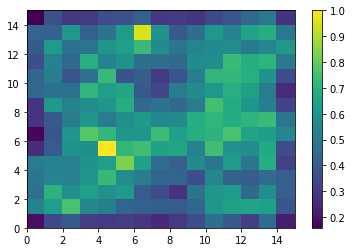

In [11]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()

In [12]:
markers = ['o', 's']
colors = ['r', 'g']

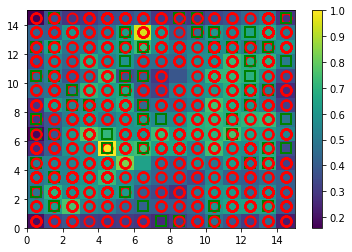

In [13]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = colors[y[i]], markeredgewidth = 2)

In [14]:
print(x)

[1.         0.98881367 0.82970913 0.53597028]


In [19]:
mapeamento = som.win_map(X)
suspeitos = np.concatenate((mapeamento[(13,9)], mapeamento[(1,10)]), axis = 0)
suspeitos = normalizador.inverse_transform(suspeitos)

classe = []
for i in range(len(base)):
    for j in range(len(suspeitos)):
        if base.iloc[i, 0] == int(round(suspeitos[j,0])):
            classe.append(base.iloc[i,4])
classe = np.asarray(classe)

suspeitos_final = np.column_stack((suspeitos, classe))
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]

In [20]:
suspeitos_final

array([[1.01000000e+02, 5.14610532e+04, 3.66515586e+01, 7.29226418e+03,
        0.00000000e+00],
       [3.13000000e+02, 5.14550985e+04, 3.72856837e+01, 9.44711716e+03,
        0.00000000e+00],
       [1.05500000e+03, 2.48207925e+04, 3.82440169e+01, 5.19492428e+01,
        0.00000000e+00],
       [1.16400000e+03, 3.09611661e+04, 3.21142866e+01, 1.62795596e+02,
        0.00000000e+00],
       [1.17200000e+03, 3.00372031e+04, 3.86849202e+01, 1.24701279e+03,
        0.00000000e+00],
       [1.20000000e+03, 2.62675294e+04, 3.44963862e+01, 5.94691634e+01,
        0.00000000e+00],
       [1.21500000e+03, 2.68671083e+04, 3.26222996e+01, 1.73015191e+03,
        0.00000000e+00],
       [1.24800000e+03, 3.17227309e+04, 3.48518173e+01, 2.87775610e+03,
        0.00000000e+00],
       [1.32200000e+03, 3.69703604e+04, 3.37045991e+01, 1.26850638e+03,
        0.00000000e+00],
       [1.37400000e+03, 3.13968660e+04, 3.49966814e+01, 3.71923013e+03,
        0.00000000e+00],
       [1.54000000e+03, 3.6455